<a href="https://colab.research.google.com/github/Abdullokh3/AI_Application_mid-term/blob/main/week_6_Lab1_first_half.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.5 kB/s 
     |████████████████████████████████| 3.8 MB 47.6 MB/s 
     |████████████████████████████████| 2.9 MB 52.4 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 503 kB 68.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8b0b1addd29b7af2d18ec0da463dc6f47ca3ac8435a6842e91c674ec86c83982
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [ ]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
learning_parameter = 0.01
epochs = 300

In [ ]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

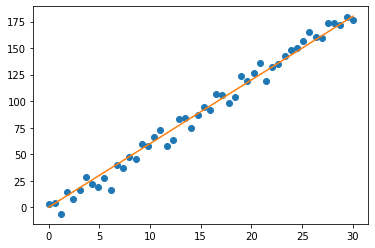

In [ ]:
# Noisy dataset
plt.plot(x_train, y_train, 'o')
# Noise free dataset 
plt.plot(x_train, 6*x_train)
plt.show()

In [ ]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

In [ ]:
#Create the model for regression
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs 0.000000 Cost 0.041880 Weight 5.823245 Bias -0.403428
Epochs 40.000000 Cost 0.309036 Weight 6.087572 Bias -0.727680
Epochs 80.000000 Cost 0.314336 Weight 6.099448 Bias -1.036465
Epochs 120.000000 Cost 0.319176 Weight 6.110201 Bias -1.316079
Epochs 160.000000 Cost 0.323589 Weight 6.119939 Bias -1.569277
Epochs 200.000000 Cost 0.327614 Weight 6.128757 Bias -1.798553
Epochs 240.000000 Cost 0.331278 Weight 6.136741 Bias -2.006170
Epochs 280.000000 Cost 0.334615 Weight 6.143972 Bias -2.194172


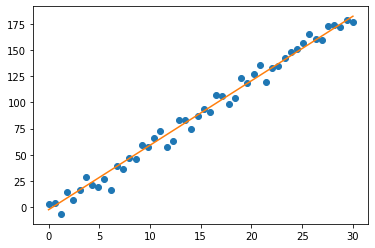

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [ ]:
# Create the model for regression
with tf.name_scope("Model") as scope:
  prediction = W*X + B

# Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

# Cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [ ]:
#Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

#Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

Epochs 0.000000 Cost 0.041880 Weight 5.823245 Bias -0.403428
Epochs 40.000000 Cost 0.309036 Weight 6.087572 Bias -0.727680
Epochs 80.000000 Cost 0.314336 Weight 6.099448 Bias -1.036465
Epochs 120.000000 Cost 0.319176 Weight 6.110201 Bias -1.316079
Epochs 160.000000 Cost 0.323589 Weight 6.119939 Bias -1.569277
Epochs 200.000000 Cost 0.327614 Weight 6.128757 Bias -1.798553
Epochs 240.000000 Cost 0.331278 Weight 6.136741 Bias -2.006170
Epochs 280.000000 Cost 0.334615 Weight 6.143972 Bias -2.194172


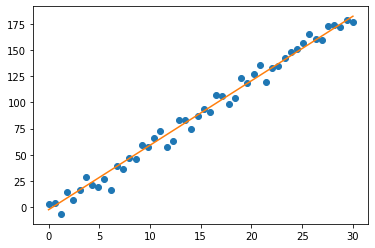

In [ ]:
# Define the tensorflow session
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()